<b><font size="3">Importing Libraries</font></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

<b><font size="3">Importing & Inserting Column Names for Dataset</font></b>

In [2]:
col_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug.Boot', 'Safety', 'Class']

In [3]:
car_data = pd.read_csv('C:\\Users\\jorom\\Documents\\University\\Trimester 1\\Assignment\\Machine Learning & Data Mining\\Items\\car.data', names = col_names)

<b><font size="3">Reading the Dataset</font></b>

In [4]:
print("The data set has {} rows and {} columns.".format(car_data.shape[0],car_data.shape[1]))

The data set has 1728 rows and 7 columns.


In [5]:
car_data.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug.Boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
car_data.describe()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
car_data.isnull().any()

Buying      False
Maint       False
Doors       False
Persons     False
Lug.Boot    False
Safety      False
Class       False
dtype: bool

In [9]:
for col in car_data.columns:
    print("Column:", col)
    print(car_data[col].value_counts(),'\n')

Column: Buying
vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64 

Column: Maint
vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64 

Column: Doors
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64 

Column: Persons
2       576
4       576
more    576
Name: Persons, dtype: int64 

Column: Lug.Boot
small    576
med      576
big      576
Name: Lug.Boot, dtype: int64 

Column: Safety
low     576
med     576
high    576
Name: Safety, dtype: int64 

Column: Class
unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64 



<AxesSubplot:xlabel='Class', ylabel='count'>

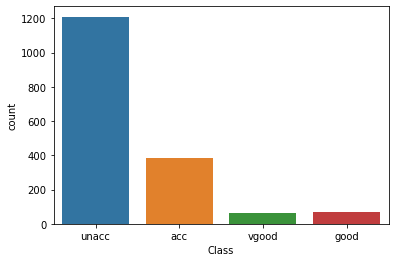

In [10]:
sns.countplot(car_data['Class'])

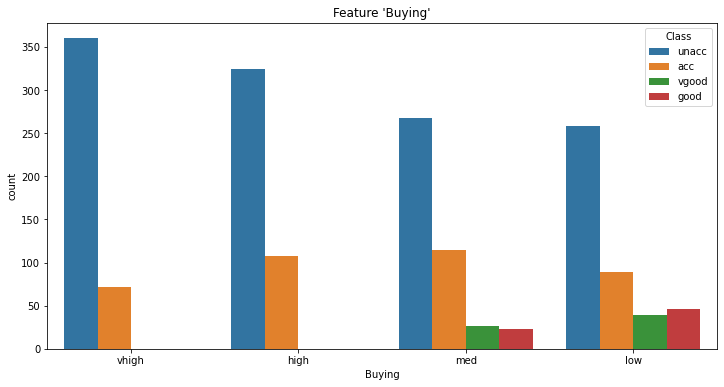

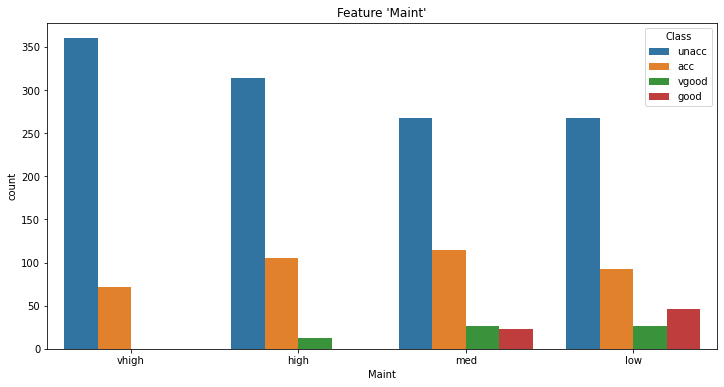

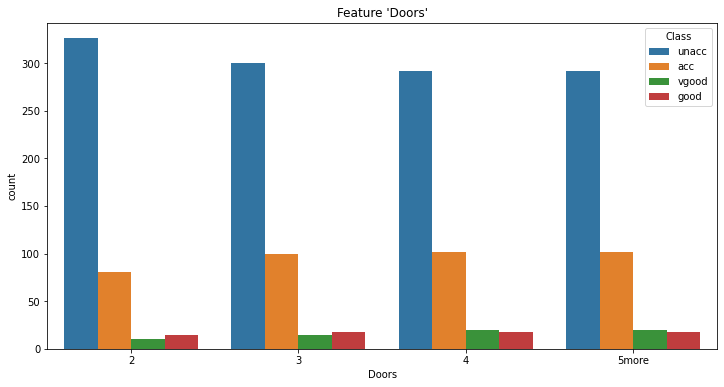

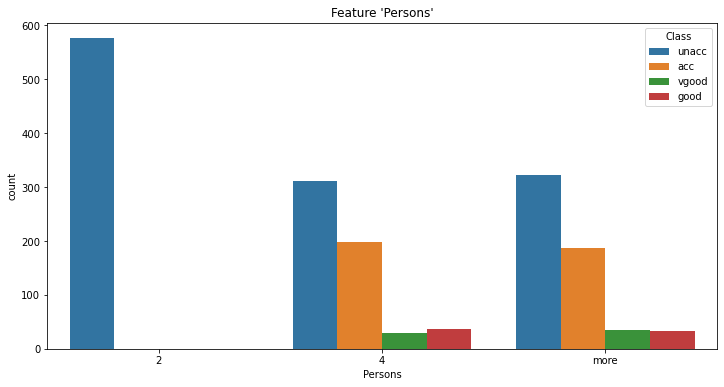

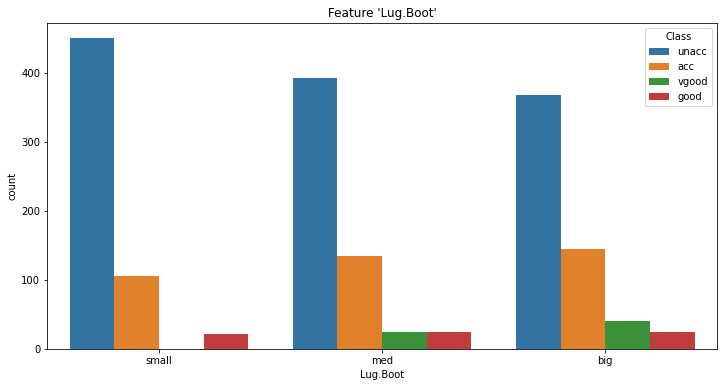

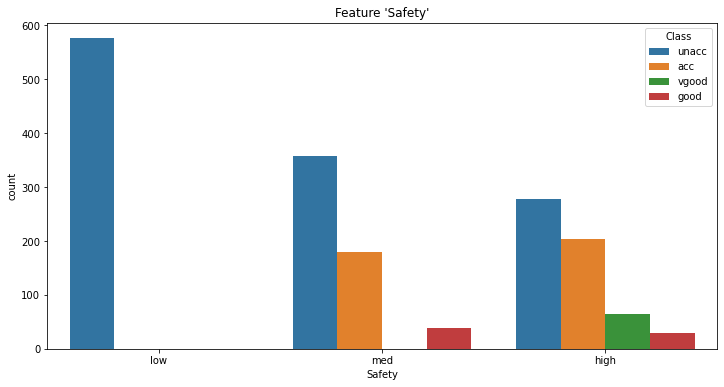

In [11]:
for i in car_data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("Feature '%s'"%i)
    sns.countplot(car_data[i],hue=car_data['Class'])

<b><font size="3">Using LabelEncoder to Convert Values to Numeric</font></b>

In [12]:
le=LabelEncoder()

In [13]:
for i in car_data.columns:
    car_data[i]=le.fit_transform(car_data[i])

In [14]:
car_data.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

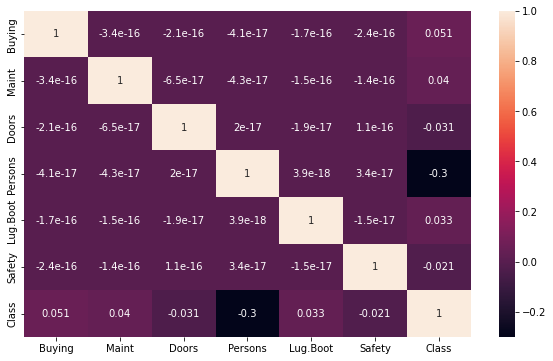

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(car_data.corr(), annot=True)

<b><font size="3">Splitting the Data for Accuracy Tests</font></b>

In [16]:
X = car_data[car_data.columns[:-1]]
Y = car_data['Class']

In [17]:
X.head()

,Buying,Maint,Doors,Persons,Lug.Boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [18]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int32

In [19]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.30, random_state = 0)

<b><font size="3">Creating Model for K-Neighbor Classifier</font></b>

In [20]:
n = 10 
param_grid = {'n_neighbors': np.arange(n)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_Train, Y_Train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [21]:
grid.best_params_

{'n_neighbors': 6}

In [22]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [23]:
knn.fit(X_Train, Y_Train)
knn.score(X_Test, Y_Test)
pred_knn = knn.predict(X_Test)

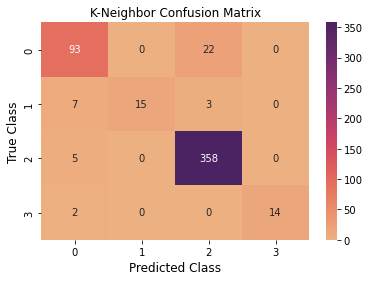

In [24]:
plt.title('K-Neighbor Confusion Matrix')
sns.heatmap(confusion_matrix(Y_Test, pred_knn), cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12) 
plt.ylabel("True Class", fontsize=12) 
plt.show()

In [25]:
print(classification_report(Y_Test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       115
           1       1.00      0.60      0.75        25
           2       0.93      0.99      0.96       363
           3       1.00      0.88      0.93        16

    accuracy                           0.92       519
   macro avg       0.95      0.82      0.87       519
weighted avg       0.93      0.92      0.92       519



In [26]:
print('Accuracy of K-NN Classifier on Training Set: {:.2f}'
     .format(knn.score(X_Train, Y_Train)))
print('Accuracy of K-NN Classifier on Test Set: {:.2f}'
     .format(knn.score(X_Test, Y_Test)))

Accuracy of K-NN Classifier on Training Set: 0.96
Accuracy of K-NN Classifier on Test Set: 0.92


<b><font size="3">Creating Model for Decision Tree Classifier</font></b>

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(X_Train, Y_Train)
dt.score(X_Test, Y_Test)
pred_dt = dt.predict(X_Test)

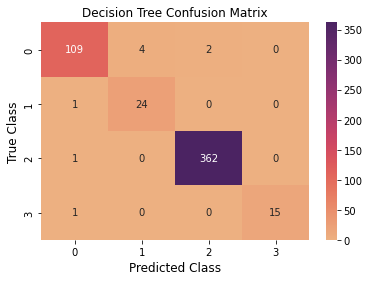

In [29]:
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(Y_Test, pred_dt), cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12) 
plt.ylabel("True Class", fontsize=12) 
plt.show()

In [30]:
print(classification_report(Y_Test, pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.86      0.96      0.91        25
           2       0.99      1.00      1.00       363
           3       1.00      0.94      0.97        16

    accuracy                           0.98       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



In [31]:
print('Accuracy of Decision Tree classifier on Training Set: {:.2f}'
     .format(dt.score(X_Train, Y_Train)))
print('Accuracy of Decision Tree classifier on Test Set: {:.2f}'
     .format(dt.score(X_Test, Y_Test)))

Accuracy of Decision Tree classifier on Training Set: 1.00
Accuracy of Decision Tree classifier on Test Set: 0.98
